# EDA: Light Curve Events Results

Exploratory data analysis of `lc_events_results_12_12.5.csv` from malca events.py pipeline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Load Data

In [4]:
import os
osname = os.name
if osname == "Linux":
    df = pd.read_csv('/home/calder/code/malca/output/lc_events_results_12_12.5.csv')
elif osname == "Darwin":  # macOS
    df = pd.read_csv('/Users/calder/code/malca/output/lc_events_results_12_12.5.csv')

print(f"Loaded {len(df)} light curves")
df.head()

Loaded 950519 light curves


,path,dip_significant,jump_significant,n_points,jd_first,jd_last,cadence_median_days,dip_best_morph,dip_best_delta_bic,dip_best_width_param,...,dipper_score,dipper_n_dips,dipper_n_valid_dips,used_sigma_eff,baseline_source,trigger_mode,dip_trigger_threshold,jump_trigger_threshold,dip_run_sum_threshold,jump_run_sum_threshold
0,/data/poohbah/1/assassin/rowan.90/lcsv2/12_12....,False,False,1801,0.801345,9999.821888,1.003458,none,0.0,0.0,...,0.0,0,0,True,gp_sho,posterior_prob,1.0,1.0,1.999999,1.999999
1,/data/poohbah/1/assassin/rowan.90/lcsv2/12_12....,False,False,3212,0.512438,9999.540669,0.791843,none,0.0,0.0,...,0.0,0,0,True,gp_sho,posterior_prob,1.0,1.0,1.999999,1.999999
2,/data/poohbah/1/assassin/rowan.90/lcsv2/12_12....,False,False,3309,0.641538,9999.774068,0.749923,none,0.0,0.0,...,0.0,0,0,True,gp_sho,posterior_prob,1.0,1.0,1.999999,1.999999
3,/data/poohbah/1/assassin/rowan.90/lcsv2/12_12....,False,False,2388,0.641538,9999.774068,0.921250,none,0.0,0.0,...,0.0,0,0,True,gp_sho,posterior_prob,1.0,1.0,1.999999,1.999999
4,/data/poohbah/1/assassin/rowan.90/lcsv2/12_12....,False,False,2092,0.641538,9999.417329,0.991891,none,0.0,0.0,...,0.0,0,0,True,gp_sho,posterior_prob,1.0,1.0,1.999999,1.999999


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950519 entries, 0 to 950518
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   path                    950519 non-null  object 
 1   dip_significant         950519 non-null  bool   
 2   jump_significant        950519 non-null  bool   
 3   n_points                950519 non-null  int64  
 4   jd_first                950519 non-null  float64
 5   jd_last                 950519 non-null  float64
 6   cadence_median_days     950519 non-null  float64
 7   dip_best_morph          950519 non-null  object 
 8   dip_best_delta_bic      950519 non-null  float64
 9   dip_best_width_param    943238 non-null  float64
 10  jump_best_morph         950519 non-null  object 
 11  jump_best_delta_bic     950519 non-null  float64
 12  jump_best_width_param   946127 non-null  float64
 13  dip_count               950519 non-null  int64  
 14  jump_count          

## 2. Basic Statistics

In [6]:
print("=== Detection Summary ===")
print(f"Total light curves: {len(df)}")
print(f"Dip detections: {df['dip_significant'].sum()} ({df['dip_significant'].sum()/len(df)*100:.2f}%)")
print(f"Jump detections: {df['jump_significant'].sum()} ({df['jump_significant'].sum()/len(df)*100:.2f}%)")
print(f"Either dip or jump: {(df['dip_significant'] | df['jump_significant']).sum()}")
print(f"Both dip and jump: {(df['dip_significant'] & df['jump_significant']).sum()}")

=== Detection Summary ===
Total light curves: 950519
Dip detections: 20315 (2.14%)
Jump detections: 17614 (1.85%)
Either dip or jump: 27610
Both dip and jump: 10319


In [7]:
df.describe()

/home/calder/miniforge3/envs/malca/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,n_points,jd_first,jd_last,cadence_median_days,dip_best_delta_bic,dip_best_width_param,jump_best_delta_bic,jump_best_width_param,dip_count,jump_count,...,n_cameras,camera_min_points,camera_max_points,dipper_score,dipper_n_dips,dipper_n_valid_dips,dip_trigger_threshold,jump_trigger_threshold,dip_run_sum_threshold,jump_run_sum_threshold
count,950519.000000,950519.000000,950519.000000,950519.000000,9.505190e+05,9.432380e+05,9.505190e+05,9.461270e+05,950519.000000,950519.000000,...,950519.000000,950519.000000,950519.000000,9.505190e+05,950519.000000,950519.000000,9.505190e+05,9.505190e+05,9.505190e+05,9.505190e+05
mean,1329.602831,20.344112,9983.318627,1.478968,7.723602e+02,2.677594e+00,5.791855e+02,1.751693e-01,0.276373,0.289235,...,6.433201,109.088547,327.501145,-inf,4.285988,0.414109,9.999997e-01,9.999997e-01,1.999999e+00,1.999999e+00
std,567.220775,243.769426,28.347355,0.587742,2.036918e+05,2.938117e+03,9.474344e+04,9.693092e+03,3.427948,3.787541,...,2.837897,79.639413,92.112082,NaN,32.494649,3.601083,2.553514e-15,2.553514e-15,5.107029e-15,5.107029e-15
min,215.000000,0.000952,8382.710214,0.001300,0.000000e+00,-1.289567e+06,0.000000e+00,-8.214421e+06,0.000000,0.000000,...,2.000000,1.000000,89.000000,-inf,0.000000,0.000000,9.999997e-01,9.999997e-01,1.999999e+00,1.999999e+00
25%,993.000000,0.745283,9974.760960,1.043573,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,4.000000,36.000000,258.000000,0.000000e+00,0.000000,0.000000,9.999997e-01,9.999997e-01,1.999999e+00,1.999999e+00
50%,1176.000000,2.083113,9998.853062,1.201325,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,6.000000,95.000000,308.000000,0.000000e+00,0.000000,0.000000,9.999997e-01,9.999997e-01,1.999999e+00,1.999999e+00
75%,1500.000000,15.823205,9999.646212,1.903995,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,8.000000,174.000000,388.000000,0.000000e+00,0.000000,0.000000,9.999997e-01,9.999997e-01,1.999999e+00,1.999999e+00
max,6571.000000,8571.070188,9999.997180,3.968986,1.223322e+08,1.940111e+06,4.076377e+07,2.858034e+06,347.000000,290.000000,...,29.000000,473.000000,889.000000,2.544679e+01,885.000000,153.000000,9.999997e-01,9.999997e-01,1.999999e+00,1.999999e+00


## 3. Light Curve Quality Metrics

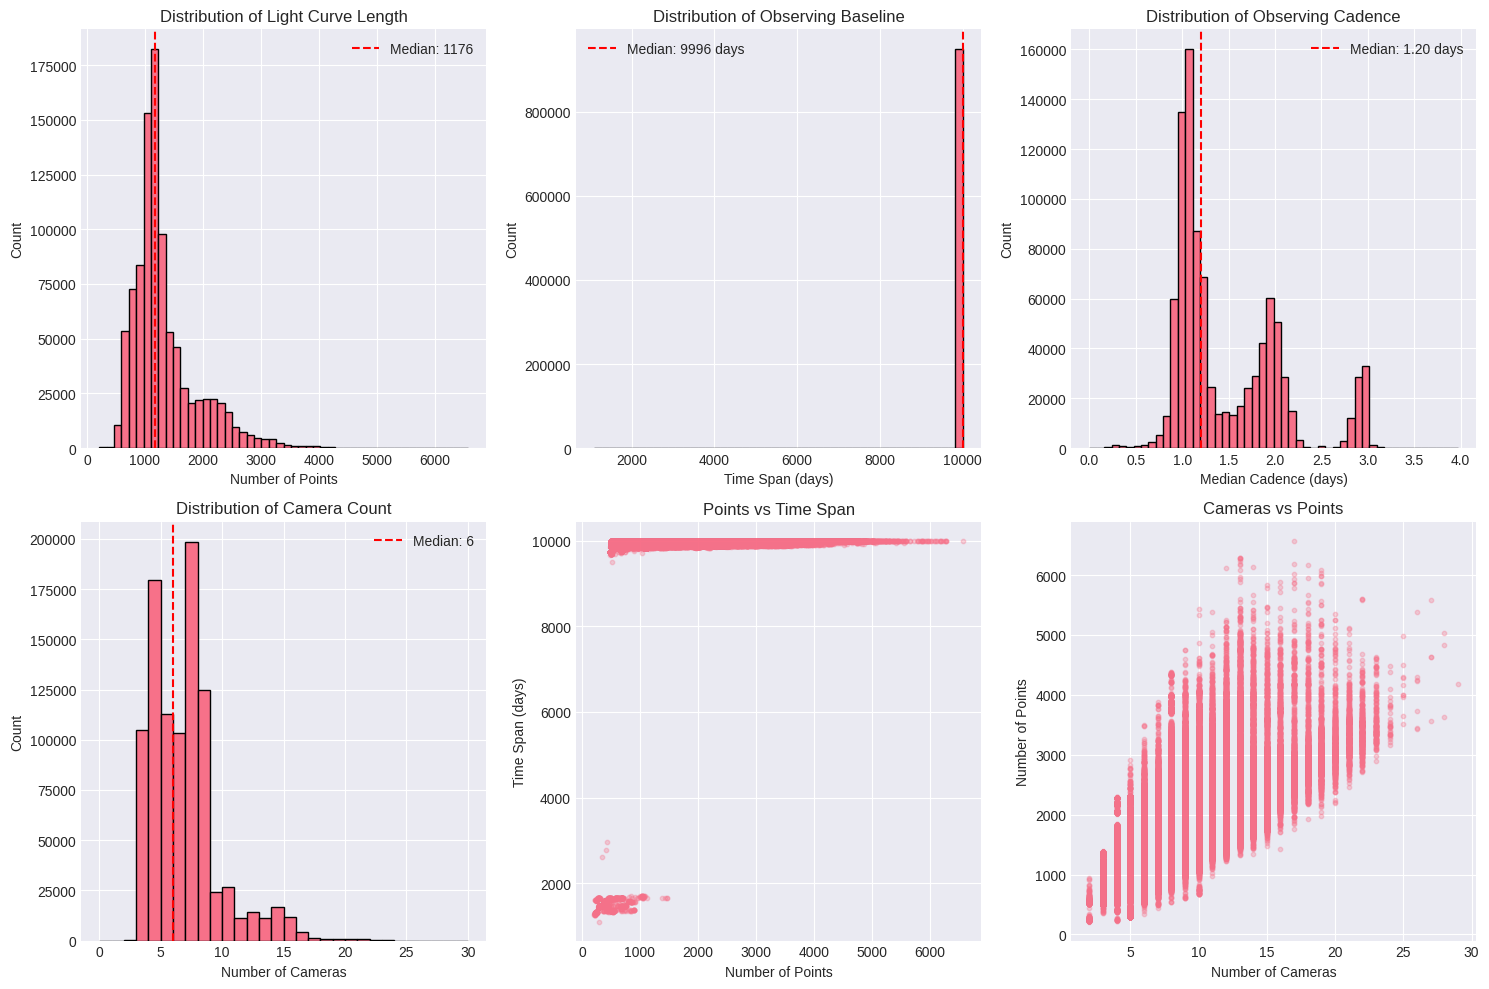

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].hist(df['n_points'], bins=50, edgecolor='black')
axes[0, 0].set_xlabel('Number of Points')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Light Curve Length')
axes[0, 0].axvline(df['n_points'].median(), color='red', linestyle='--', label=f'Median: {df["n_points"].median():.0f}')
axes[0, 0].legend()

time_span = df['jd_last'] - df['jd_first']
axes[0, 1].hist(time_span, bins=50, edgecolor='black')
axes[0, 1].set_xlabel('Time Span (days)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Observing Baseline')
axes[0, 1].axvline(time_span.median(), color='red', linestyle='--', label=f'Median: {time_span.median():.0f} days')
axes[0, 1].legend()

axes[0, 2].hist(df['cadence_median_days'], bins=50, edgecolor='black')
axes[0, 2].set_xlabel('Median Cadence (days)')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Distribution of Observing Cadence')
axes[0, 2].axvline(df['cadence_median_days'].median(), color='red', linestyle='--', label=f'Median: {df["cadence_median_days"].median():.2f} days')
axes[0, 2].legend()

axes[1, 0].hist(df['n_cameras'], bins=range(0, int(df['n_cameras'].max())+2), edgecolor='black')
axes[1, 0].set_xlabel('Number of Cameras')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Camera Count')
axes[1, 0].axvline(df['n_cameras'].median(), color='red', linestyle='--', label=f'Median: {df["n_cameras"].median():.0f}')
axes[1, 0].legend()

axes[1, 1].scatter(df['n_points'], time_span, alpha=0.3, s=10)
axes[1, 1].set_xlabel('Number of Points')
axes[1, 1].set_ylabel('Time Span (days)')
axes[1, 1].set_title('Points vs Time Span')

axes[1, 2].scatter(df['n_cameras'], df['n_points'], alpha=0.3, s=10)
axes[1, 2].set_xlabel('Number of Cameras')
axes[1, 2].set_ylabel('Number of Points')
axes[1, 2].set_title('Cameras vs Points')

plt.tight_layout()
plt.show()

## 4. Detection Metrics

/home/calder/miniforge3/envs/malca/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


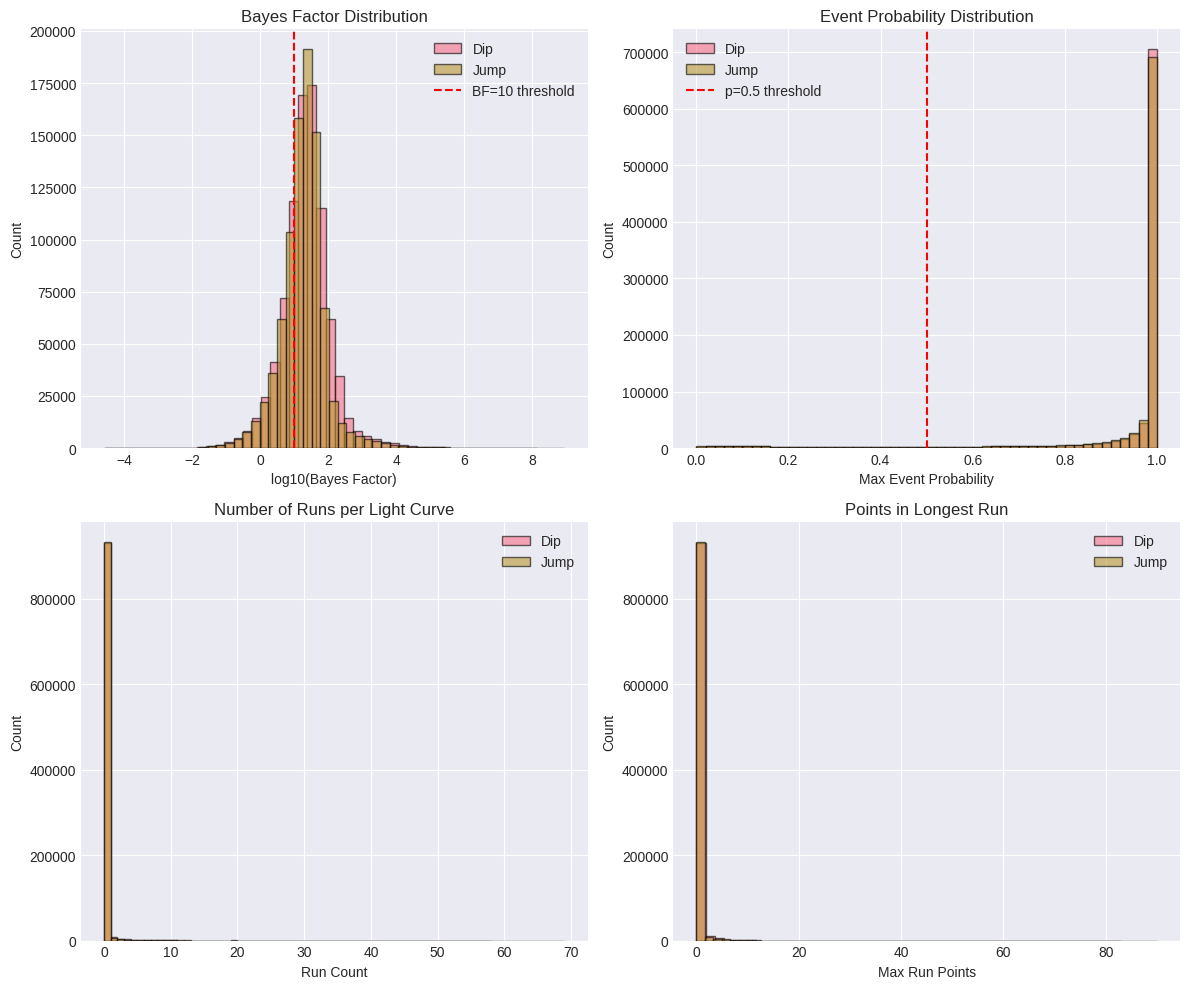

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(np.log10(df['dip_bayes_factor'].replace(0, np.nan).dropna()), bins=50, alpha=0.6, label='Dip', edgecolor='black')
axes[0, 0].hist(np.log10(df['jump_bayes_factor'].replace(0, np.nan).dropna()), bins=50, alpha=0.6, label='Jump', edgecolor='black')
axes[0, 0].set_xlabel('log10(Bayes Factor)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Bayes Factor Distribution')
axes[0, 0].axvline(np.log10(10), color='red', linestyle='--', label='BF=10 threshold')
axes[0, 0].legend()

axes[0, 1].hist(df['dip_max_event_prob'], bins=50, alpha=0.6, label='Dip', edgecolor='black')
axes[0, 1].hist(df['jump_max_event_prob'], bins=50, alpha=0.6, label='Jump', edgecolor='black')
axes[0, 1].set_xlabel('Max Event Probability')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Event Probability Distribution')
axes[0, 1].axvline(0.5, color='red', linestyle='--', label='p=0.5 threshold')
axes[0, 1].legend()

axes[1, 0].hist(df['dip_run_count'], bins=range(0, int(df['dip_run_count'].max())+2), alpha=0.6, label='Dip', edgecolor='black')
axes[1, 0].hist(df['jump_run_count'], bins=range(0, int(df['jump_run_count'].max())+2), alpha=0.6, label='Jump', edgecolor='black')
axes[1, 0].set_xlabel('Run Count')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Number of Runs per Light Curve')
axes[1, 0].legend()

axes[1, 1].hist(df['dip_max_run_points'], bins=50, alpha=0.6, label='Dip', edgecolor='black')
axes[1, 1].hist(df['jump_max_run_points'], bins=50, alpha=0.6, label='Jump', edgecolor='black')
axes[1, 1].set_xlabel('Max Run Points')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Points in Longest Run')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 5. Morphology Analysis

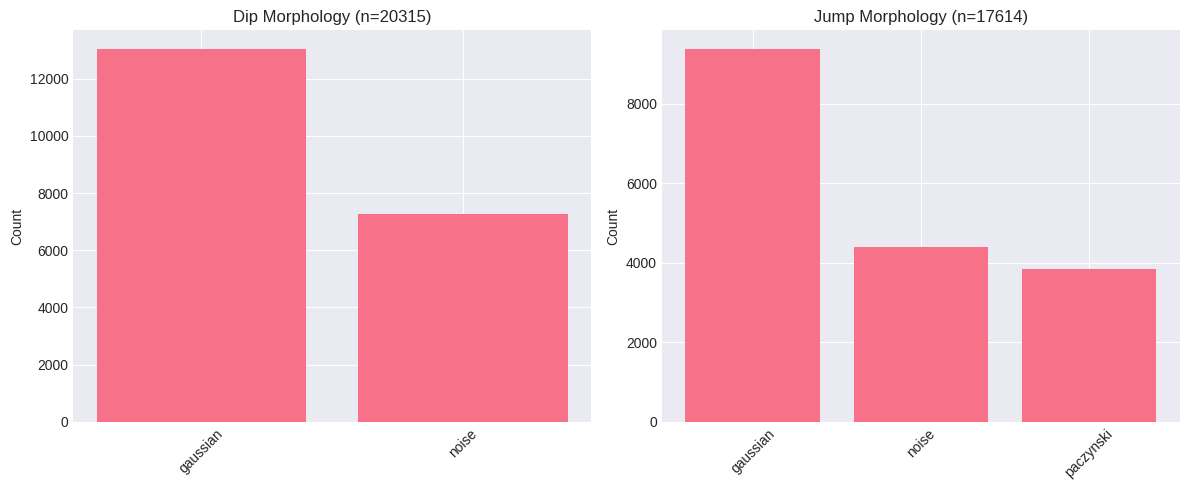

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

dip_morphs = df[df['dip_best_morph'] != 'none']['dip_best_morph'].value_counts()
axes[0].bar(range(len(dip_morphs)), dip_morphs.values, tick_label=dip_morphs.index)
axes[0].set_ylabel('Count')
axes[0].set_title(f'Dip Morphology (n={dip_morphs.sum()})')
axes[0].tick_params(axis='x', rotation=45)

jump_morphs = df[df['jump_best_morph'] != 'none']['jump_best_morph'].value_counts()
axes[1].bar(range(len(jump_morphs)), jump_morphs.values, tick_label=jump_morphs.index)
axes[1].set_ylabel('Count')
axes[1].set_title(f'Jump Morphology (n={jump_morphs.sum()})')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

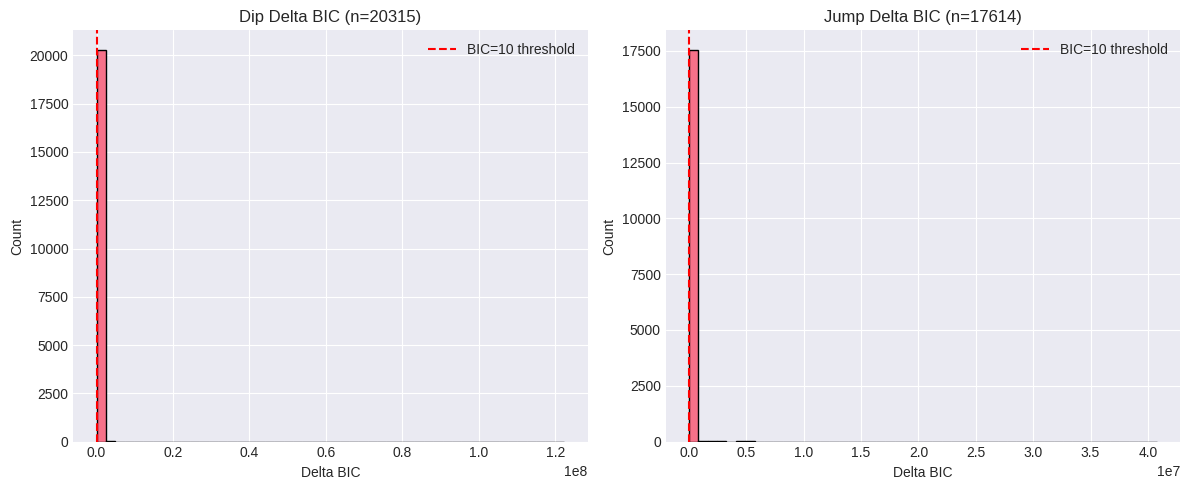

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

dip_with_morph = df[df['dip_best_morph'] != 'none']
axes[0].hist(dip_with_morph['dip_best_delta_bic'], bins=50, edgecolor='black')
axes[0].set_xlabel('Delta BIC')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Dip Delta BIC (n={len(dip_with_morph)})')
axes[0].axvline(10, color='red', linestyle='--', label='BIC=10 threshold')
axes[0].legend()

jump_with_morph = df[df['jump_best_morph'] != 'none']
axes[1].hist(jump_with_morph['jump_best_delta_bic'], bins=50, edgecolor='black')
axes[1].set_xlabel('Delta BIC')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Jump Delta BIC (n={len(jump_with_morph)})')
axes[1].axvline(10, color='red', linestyle='--', label='BIC=10 threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

## 6. Dipper Score Analysis

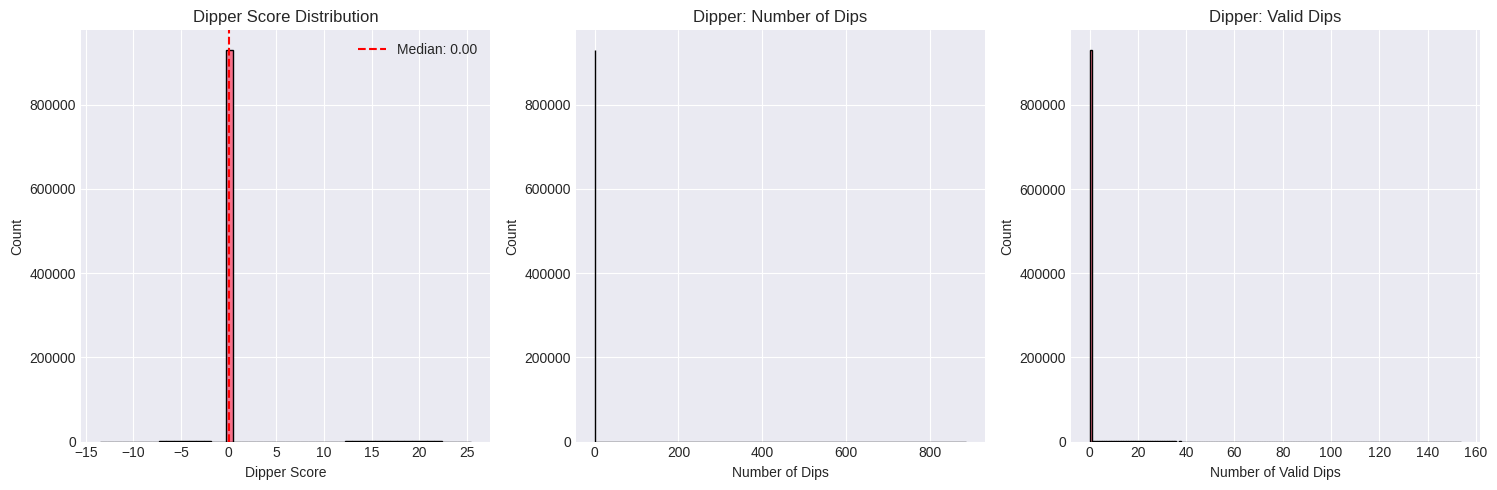

In [13]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Filter out -inf, inf, and NaN values
clean_score = df['dipper_score'][np.isfinite(df['dipper_score'])]
axes[0].hist(clean_score, bins=50, edgecolor='black')
axes[0].set_xlabel('Dipper Score')
axes[0].set_ylabel('Count')
axes[0].set_title('Dipper Score Distribution')
axes[0].axvline(clean_score.median(), color='red', linestyle='--', label=f'Median: {clean_score.median():.2f}')
axes[0].legend()
axes[1].hist(df['dipper_n_dips'], bins=range(0, int(df['dipper_n_dips'].max())+2), edgecolor='black')
axes[1].set_xlabel('Number of Dips')
axes[1].set_ylabel('Count')
axes[1].set_title('Dipper: Number of Dips')
axes[2].hist(df['dipper_n_valid_dips'], bins=range(0, int(df['dipper_n_valid_dips'].max())+2), edgecolor='black')
axes[2].set_xlabel('Number of Valid Dips')
axes[2].set_ylabel('Count')
axes[2].set_title('Dipper: Valid Dips')
plt.tight_layout()
plt.show()

## 7. Correlation Analysis

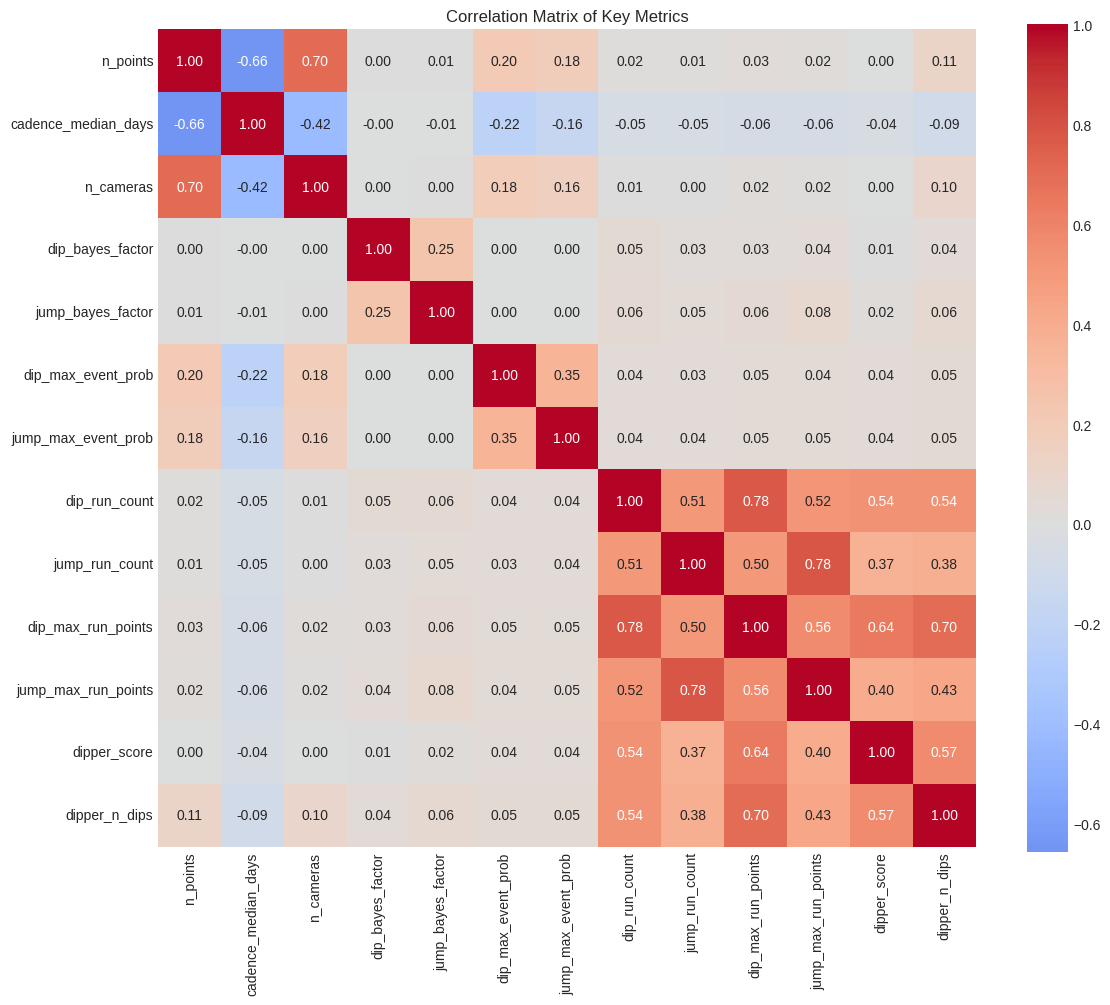

In [14]:
numeric_cols = [
    'n_points', 'cadence_median_days', 'n_cameras',
    'dip_bayes_factor', 'jump_bayes_factor',
    'dip_max_event_prob', 'jump_max_event_prob',
    'dip_run_count', 'jump_run_count',
    'dip_max_run_points', 'jump_max_run_points',
    'dipper_score', 'dipper_n_dips'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()
plt.show()

## 8. Filter Performance Analysis

In [15]:
print("=== Filter Thresholds Analysis ===")
print()

bf_thresholds = [1, 3, 10, 30, 100]
print("Bayes Factor Thresholds:")
for thresh in bf_thresholds:
    n_dip = (df['dip_bayes_factor'] > thresh).sum()
    n_jump = (df['jump_bayes_factor'] > thresh).sum()
    n_either = ((df['dip_bayes_factor'] > thresh) | (df['jump_bayes_factor'] > thresh)).sum()
    print(f"  BF > {thresh:3d}: dip={n_dip:4d} ({n_dip/len(df)*100:5.2f}%), jump={n_jump:4d} ({n_jump/len(df)*100:5.2f}%), either={n_either:4d} ({n_either/len(df)*100:5.2f}%)")

print()
prob_thresholds = [0.5, 0.7, 0.9, 0.95, 0.99]
print("Event Probability Thresholds:")
for thresh in prob_thresholds:
    n_dip = (df['dip_max_event_prob'] > thresh).sum()
    n_jump = (df['jump_max_event_prob'] > thresh).sum()
    n_either = ((df['dip_max_event_prob'] > thresh) | (df['jump_max_event_prob'] > thresh)).sum()
    print(f"  P > {thresh:.2f}: dip={n_dip:4d} ({n_dip/len(df)*100:5.2f}%), jump={n_jump:4d} ({n_jump/len(df)*100:5.2f}%), either={n_either:4d} ({n_either/len(df)*100:5.2f}%)")

print()
print("Run Count Requirements:")
for min_runs in [1, 2, 3]:
    n_dip = (df['dip_run_count'] >= min_runs).sum()
    n_jump = (df['jump_run_count'] >= min_runs).sum()
    n_either = ((df['dip_run_count'] >= min_runs) | (df['jump_run_count'] >= min_runs)).sum()
    print(f"  Runs >= {min_runs}: dip={n_dip:4d} ({n_dip/len(df)*100:5.2f}%), jump={n_jump:4d} ({n_jump/len(df)*100:5.2f}%), either={n_either:4d} ({n_either/len(df)*100:5.2f}%)")

=== Filter Thresholds Analysis ===

Bayes Factor Thresholds:
  BF >   1: dip=855877 (90.04%), jump=854572 (89.91%), either=916563 (96.43%)
  BF >   3: dip=805340 (84.73%), jump=801444 (84.32%), either=890930 (93.73%)
  BF >  10: dip=654444 (68.85%), jump=637417 (67.06%), either=787124 (82.81%)
  BF >  30: dip=365716 (38.48%), jump=314314 (33.07%), either=486686 (51.20%)
  BF > 100: dip=117840 (12.40%), jump=68166 ( 7.17%), either=141803 (14.92%)

Event Probability Thresholds:
  P > 0.50: dip=885529 (93.16%), jump=884763 (93.08%), either=930041 (97.85%)
  P > 0.70: dip=859261 (90.40%), jump=857696 (90.23%), either=919679 (96.76%)
  P > 0.90: dip=804200 (84.61%), jump=799330 (84.09%), either=895155 (94.18%)
  P > 0.95: dip=763866 (80.36%), jump=755873 (79.52%), either=875110 (92.07%)
  P > 0.99: dip=659091 (69.34%), jump=638869 (67.21%), either=810615 (85.28%)

Run Count Requirements:
  Runs >= 1: dip=20315 ( 2.14%), jump=17614 ( 1.85%), either=27610 ( 2.90%)
  Runs >= 2: dip=12549 ( 1.3

## 9. Combined Filter Analysis

In [16]:
print("=== Combined Filtering Scenarios ===")
print()

mask_bf10 = (df['dip_bayes_factor'] > 10) | (df['jump_bayes_factor'] > 10)
mask_prob50 = (df['dip_max_event_prob'] > 0.5) | (df['jump_max_event_prob'] > 0.5)
mask_runs1 = (df['dip_run_count'] >= 1) | (df['jump_run_count'] >= 1)
mask_runpoints2 = (df['dip_max_run_points'] >= 2) | (df['jump_max_run_points'] >= 2)
mask_cameras2 = (df['dip_max_run_cameras'] >= 2) | (df['jump_max_run_cameras'] >= 2)

print(f"Starting: {len(df)} light curves")
print()

n = len(df)
scenarios = [
    ("BF > 10", mask_bf10),
    ("+ Event prob > 0.5", mask_bf10 & mask_prob50),
    ("+ Run count >= 1", mask_bf10 & mask_prob50 & mask_runs1),
    ("+ Run points >= 2", mask_bf10 & mask_prob50 & mask_runs1 & mask_runpoints2),
    ("+ Run cameras >= 2", mask_bf10 & mask_prob50 & mask_runs1 & mask_runpoints2 & mask_cameras2),
]

for label, mask in scenarios:
    n_pass = mask.sum()
    print(f"{label:25s}: {n_pass:5d} ({n_pass/n*100:5.2f}%)")

=== Combined Filtering Scenarios ===

Starting: 950519 light curves

BF > 10                  : 787124 (82.81%)
+ Event prob > 0.5       : 787124 (82.81%)
+ Run count >= 1         : 27610 ( 2.90%)
+ Run points >= 2        : 27610 ( 2.90%)
+ Run cameras >= 2       :  7198 ( 0.76%)


## 10. Top Candidates

In [17]:
df['max_bayes_factor'] = df[['dip_bayes_factor', 'jump_bayes_factor']].max(axis=1)
df['max_event_prob'] = df[['dip_max_event_prob', 'jump_max_event_prob']].max(axis=1)

top_by_bf = df.nlargest(20, 'max_bayes_factor')[[
    'path', 'dip_significant', 'jump_significant',
    'dip_bayes_factor', 'jump_bayes_factor',
    'dip_max_event_prob', 'jump_max_event_prob',
    'dip_run_count', 'jump_run_count',
    'n_points', 'n_cameras'
]]

print("=== Top 20 Candidates by Bayes Factor ===")
print(top_by_bf.to_string())

=== Top 20 Candidates by Bayes Factor ===
                                                                              path  dip_significant  jump_significant  dip_bayes_factor  jump_bayes_factor  dip_max_event_prob  jump_max_event_prob  dip_run_count  jump_run_count  n_points  n_cameras
742843  /data/poohbah/1/assassin/rowan.90/lcsv2/12_12.5/lc13_cal/575526671617.dat2             True              True      8.952113e+08       8.526342e+06                 1.0                  1.0              8               9      2343          9
742911  /data/poohbah/1/assassin/rowan.90/lcsv2/12_12.5/lc10_cal/575526678190.dat2             True              True      4.376981e+08       8.382675e+06                 1.0                  1.0              9               5      2500         10
742918   /data/poohbah/1/assassin/rowan.90/lcsv2/12_12.5/lc9_cal/575526680264.dat2             True              True      3.265278e+08       4.586450e+06                 1.0                  1.0             21    

## 11. Baseline Source Analysis

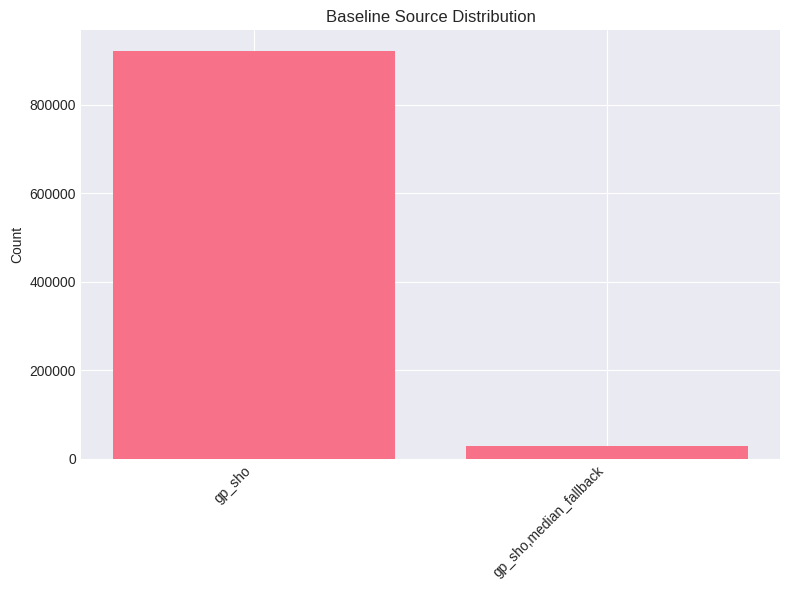


Baseline Source Counts:
  gp_sho: 922299 (97.03%)
  gp_sho,median_fallback: 28220 (2.97%)


In [18]:
baseline_counts = df['baseline_source'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(range(len(baseline_counts)), baseline_counts.values, tick_label=baseline_counts.index)
plt.ylabel('Count')
plt.title('Baseline Source Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nBaseline Source Counts:")
for source, count in baseline_counts.items():
    print(f"  {source}: {count} ({count/len(df)*100:.2f}%)")

## 12. Camera Coverage Analysis

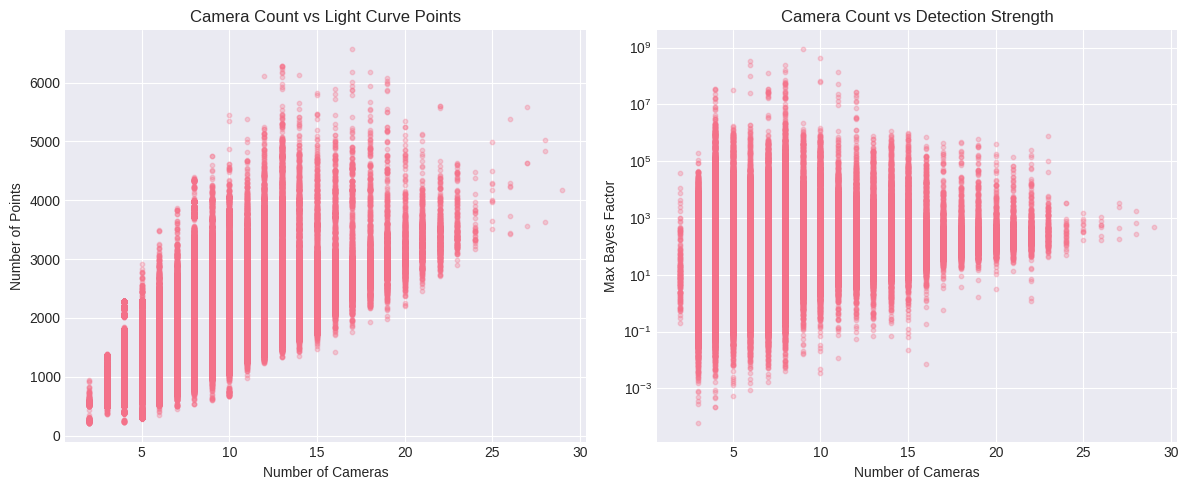

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['n_cameras'], df['n_points'], alpha=0.3, s=10)
axes[0].set_xlabel('Number of Cameras')
axes[0].set_ylabel('Number of Points')
axes[0].set_title('Camera Count vs Light Curve Points')

axes[1].scatter(df['n_cameras'], df['max_bayes_factor'], alpha=0.3, s=10)
axes[1].set_xlabel('Number of Cameras')
axes[1].set_ylabel('Max Bayes Factor')
axes[1].set_yscale('log')
axes[1].set_title('Camera Count vs Detection Strength')

plt.tight_layout()
plt.show()

## 13. Summary Statistics by Detection Type

In [20]:
print("=== Dip Detections ===")
dip_detections = df[df['dip_significant']]
if len(dip_detections) > 0:
    print(dip_detections[[
        'n_points', 'n_cameras', 'dip_bayes_factor',
        'dip_max_event_prob', 'dip_run_count', 'dip_max_run_points'
    ]].describe())
else:
    print("No dip detections")

print("\n=== Jump Detections ===")
jump_detections = df[df['jump_significant']]
if len(jump_detections) > 0:
    print(jump_detections[[
        'n_points', 'n_cameras', 'jump_bayes_factor',
        'jump_max_event_prob', 'jump_run_count', 'jump_max_run_points'
    ]].describe())
else:
    print("No jump detections")

=== Dip Detections ===
           n_points     n_cameras  dip_bayes_factor  dip_max_event_prob  \
count  20315.000000  20315.000000      2.031500e+04        2.031500e+04   
mean    1525.712380      7.349643      2.257683e+05        1.000000e+00   
std      632.997679      3.409987      8.130481e+06        3.935476e-09   
min      301.000000      2.000000      3.197285e+01        9.999998e-01   
25%     1018.000000      5.000000      8.532962e+02        1.000000e+00   
50%     1298.000000      7.000000      2.293587e+03        1.000000e+00   
75%     1945.000000      8.000000      7.602635e+03        1.000000e+00   
max     6173.000000     28.000000      8.952113e+08        1.000000e+00   

       dip_run_count  dip_max_run_points  
count   20315.000000        20315.000000  
mean        3.814275            4.043465  
std         4.570325            2.646371  
min         1.000000            2.000000  
25%         1.000000            2.000000  
50%         2.000000            3.000000  


## 14. Export Filtered Results

In [ ]:
    strong_candidates = df[
    ((df['dip_bayes_factor'] > 10) | (df['jump_bayes_factor'] > 10)) &
    ((df['dip_max_event_prob'] > 0.5) | (df['jump_max_event_prob'] > 0.5)) &
    ((df['dip_run_count'] >= 1) | (df['jump_run_count'] >= 1))
]

print(f"Found {len(strong_candidates)} strong candidates")
print(f"({len(strong_candidates)/len(df)*100:.2f}% of total)")

# add platform options again

if platform.system() == 'Linux':
    output_path = '/home/calder/code/malca/output/strong_candidates_12_12.5.csv'
elif platform.system() == 'Darwin':
    output_path = '/Users/calder/code/malca/output/strong_candidates_12_12.5.csv'

strong_candidates.to_csv(output_path, index=False)
print(f"\nSaved to: {output_path}")

Found 27610 strong candidates
(2.90% of total)


OSError: Cannot save file into a non-existent directory: '/Users/calder/code/malca/output'